In [1]:
import json
import json
import numpy as np
import json 
from os.path import exists
import os
from matplotlib import pyplot as plt
import cv2
from io import StringIO
import pandas as pd
import pdfplumber
import numpy as np

In [2]:
def file_exists(path_to_file):
    file_exists = exists(path_to_file)
    return file_exists

def create_folder(path):
    exists = file_exists(path)
    if not exists:
        os.makedirs(path)
    return path

def save_obj(path,obj):
        with open(path, 'w') as f:
                f.write(obj)
        f.close()
def open_json(path):
    with open(path, 'r') as openfile:
    
    # Reading from json file
        json_object = json.load(openfile)
        return json_object
    
def wirte_json_file(jsd,path):
    class NpEncoder(json.JSONEncoder):
        def default(self, obj):
            if isinstance(obj, np.integer):
                return int(obj)
            if isinstance(obj, np.floating):
                return float(obj)
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            return super(NpEncoder, self).default(obj)
    js = json.dumps(jsd, cls=NpEncoder,indent=4, ensure_ascii=False).encode('utf8')
    with open(path, "w") as outfile:
        outfile.write(js.decode())

In [3]:
path_dt_to_ha ='heuristica_anotacao.json'
dt_heuri = open_json(path_dt_to_ha)
len(dt_heuri)

994

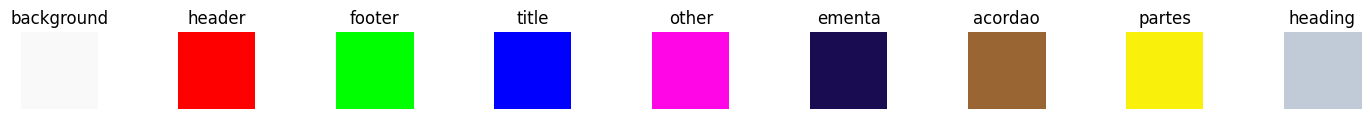

[0 1 2 3 4 5 6 7 8]
{'background': 0, 'header': 1, 'footer': 2, 'title': 3, 'other': 4, 'ementa': 5, 'acordao': 6, 'partes': 7, 'heading': 8}


In [4]:
#Colors:
WITHE = (249,249,249)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
PURPLE = (25,12,80)
PINK = (255,6,231)
BROWN = (153,102,51)
YELLOW = (249,241,12)
GREY = (193,203,216)
#labels
BACKGROUND = 'background'
HEADER = 'header'
FOOTER = 'footer'
TITLE = "title"
OTHER = "other"
EMENTA = "ementa"
ACORDAO = "acordao"
PARTES = "partes"
HEADING = "heading"
labels_color = [WITHE,RED,GREEN,BLUE,PINK,PURPLE,BROWN,YELLOW,GREY]
labels_str = [BACKGROUND,HEADER,FOOTER,TITLE,OTHER,EMENTA,ACORDAO,PARTES,HEADING]
n_labels = len(labels_str)
fig = plt.figure( figsize=(n_labels*2,1))
c = 1;
for lc,l in zip(labels_color,labels_str):
  plt.subplot(1, n_labels, c)
  plt.axis('off')
  label = np.zeros((50,50,3), np.uint8)
  label[:,0:] = lc
  plt.title( l )
  plt.imshow(label)
  c=c+1
plt.show()

labels = np.arange(len(labels_color))
print(labels)
color_label_dic = {}
for l,c in enumerate(labels_str):
  color_label_dic[labels_str[l]]= l
print(color_label_dic)

In [5]:
rows = []
for ex in dt_heuri:
    id = ex['id']
    pdf_idtm_path = f'./ITD_MINI/{id}/{id}.pdf'
    img_path = f'./vc_dataset/images/{id}.png'
    img_msk_path = f'./vc_dataset/masks/{id}.png'
    img_path_to_save = f'../acordao_semantic_segmentation/vc_dataset/images/{id}.png'
    img_msk_path_to_save = f'../acordao_semantic_segmentation/vc_dataset/masks/{id}.png'
    with pdfplumber.open(pdf_idtm_path) as pdf:
        first_page = pdf.pages[0]
        im = first_page.to_image()
        im.save(img_path_to_save, format="PNG")
        pageY,pageX = first_page.height,first_page.width
        mask = np.zeros((pageY,pageX),np.uint8)
        for seg in ex['documento']:
            bbox,label= seg['box'],seg['label']
            if ((bbox[2] - bbox[0]) > 1) and ((bbox[3] - bbox[1]) > 1):
                cv2.rectangle(mask,(bbox[0], bbox[1]),(bbox[2], bbox[3]),color_label_dic[label],-1)
        cv2.imwrite(img_msk_path_to_save, mask)
        rows.append([id,pdf_idtm_path,img_path,img_msk_path])
    

   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: /BBox has zero width or height, which is not allowed.
               Output may be incorrect.
   **** Error: Executing Do inside a text block, attempting to recover
               Output may be incorrect.
   **** Error: Executing Do inside a text block, attempting to recover
               Output may be incorrect.
   **** Error: Executing Do inside a text block, attempting to recover
               Output may be incorrect.
   **** Error

In [6]:
cols = ['id','pdf_path','img_path','mask_path']
df = pd.DataFrame(columns=cols,data=rows)
df.to_csv('../acordao_semantic_segmentation/image_pre_cv.csv',index=False)

ATENÇÃO! É PRECISO COPIAR O ITD_MINI PARA O DIRETÓRIO ../acordao_semantic_segmentation, pois esse projeto rodará em um container, execute a célula abaixo

In [7]:
!cp -r ITD_MINI ../acordao_semantic_segmentation